# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 5 - Classificação KNN</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
%matplotlib inline

In [2]:
class kNN():

    def __init__(self, k):
        self.k = k

    def _euclidian_distance(self, x1, x2):
        """Computes Euclidian Distance b/w two feature vectors
        X1 can be a numpy ndarray and x2 is numpy array
        """
        a= x1-x2
        a2 = a**2
        b = np.sum(a2, axis=1)
        c = np.sqrt(b)
        return c
#         return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

    def fit(self, X, y):
        """takes input of features and corresponding labels

        """
        self.X_data = X
        self.y = y

    def predict(self, X):
        """Classify features according to euclidian_distance from all data points

        Parameters:

        X:
        numpy ndarray

        """

        Xn = np.copy(X)

        preds = []
        # Calcula distância de todos os pontos
        for x1 in Xn:
            dist = self._euclidian_distance(self.X_data, x1)
            dist = np.vstack((dist, self.y)).T
            dist = dist[dist[:, 0].argsort(axis=0)][:,-1]
            # Top k
            pred = sts.mode(dist[0:self.k])[0][0]
            preds.append(pred)

        return np.array(preds)

In [3]:
# Carrega o dataset
data = pd.read_csv('iris.data', header=None)

In [4]:
h = .02  # step size in the mesh
# Color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [5]:
# Apenas duas primeiras colunas
X = data.iloc[:, :2].values
y = data.iloc[:, -1]

In [6]:
# Converte para floats 0,1,2
y = y.apply(lambda x: 0 if x == 'Iris-setosa' else x)
y = y.apply(lambda x: 1 if x == 'Iris-versicolor' else x)
y = y.apply(lambda x: 2 if x == 'Iris-virginica' else x)

y = y.values

n_neighbors = 10

In [7]:
# ======================================
# my kNN
cl = kNN(n_neighbors)
cl.fit(X, y)


In [8]:
# scikit-learn
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [9]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [10]:
# Obtém as previsões
knn_preds = clf.predict(np.c_[xx.ravel(), yy.ravel()])
scikit_preds = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [11]:
# Put the result into a color plot
knn_preds = knn_preds.reshape(xx.shape)
scikit_preds = scikit_preds.reshape(xx.shape)

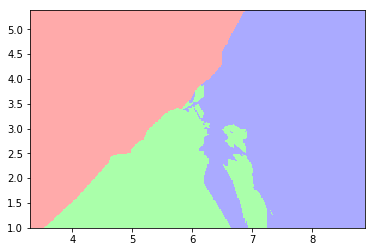

In [12]:
# Plot das previsões KNN
plt.figure()
plt.pcolormesh(xx, yy, knn_preds, cmap=cmap_light,
               vmin=knn_preds.min(), vmax=knn_preds.max())

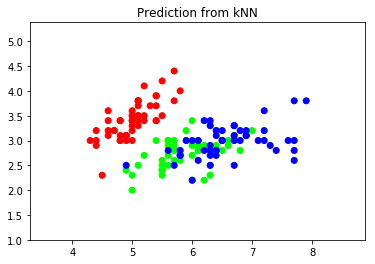

In [13]:
# Plot dos pontos de dados de treinamento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Prediction from kNN')
plt.savefig('knn_example.png')

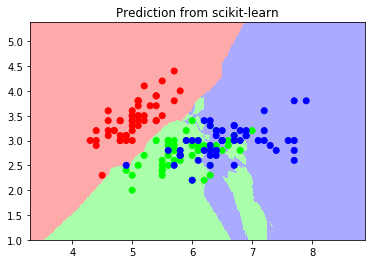

In [14]:
# Plot previsões scikit-learn 
plt.figure()
plt.pcolormesh(xx, yy, scikit_preds, cmap=cmap_light,
               vmin=scikit_preds.min(), vmax=scikit_preds.max())

# Plot dos pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Prediction from scikit-learn')

plt.show()

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>